# Temilade Week one Challenge
# ID: 141772020
# temiladeadelakun16@gmail.com


Here is my solution


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
#import libraries
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
!pip install fire

You should consider upgrading via the 'c:\users\temilade\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


## Hundred Most Influential Twitter Users in Africa

Here is my code on getting the handles of the 100 most influential twitter users in Africa
 

In [3]:
#getting the website page
url = "https://africafreak.com/100-most-influential-twitter-users-in-africa"
html = urlopen(url)

In [4]:
#converting to a BeautifulSoup object
soup = BeautifulSoup(html, 'lxml')

#extracting the header
headers= [i.text for i in soup.find_all("h2") if '@' in i.text]
headers

['100. Jeffrey Gettleman (@gettleman)',
 '99. Africa24 Media (@a24media)',
 '98. Scapegoat (@andiMakinana)',
 '97. Africa Check (@AfricaCheck)',
 '96. James Copnall (@JamesCopnall)',
 '95. Online Africa (@oafrica)',
 '94. Patrick Ngowi (@PatrickNgowi)',
 '93. DOS African Affairs (@StateAfrica)',
 '92. MoadowAJE (@Moadow)',
 '91. Brendan Boyle (@BrendanSAfrica)',
 '90. City of Tshwane (@CityTshwane)',
 '89. VISI Magazine (@VISI_Mag)',
 '88. andBeyond (@andBeyondSafari)',
 '87. This Is Africa (@ThisIsAfricaTIA)',
 '86. Sarah Carter (@sarzss)',
 '85. The EIU Africa team (@TheEIU_Africa)',
 '84. Investing In Africa (@InvestInAfrica)',
 '83. Barry Malone (@malonebarry)',
 '82. ARTsouthAFRICA (@artsouthafrica)',
 '81. Kahn Morbee (@KahnMorbee)',
 '80. Jamal Osman (@JamalMOsman)',
 '79. iamsuede™ (@iamsuede)',
 '78. Mike Stopforth (@mikestopforth)',
 '77. Equal Education (@equal_education)',
 '76. Tristan McConnell (@t_mcconnell)',
 '75. Kate Forbes (@forbeesta)',
 '74. Vanessa Raphaely (@hur

In [5]:
#Data Cleaning
identity = []
twitter_handle = []
for i in headers:
    i = i.split('(')
    i[0] = i[0].split('.')
    twitter_handle.append(i[1].replace(')', ''))
    identity.append(i[0])
    
identity[:10]

[['100', ' Jeffrey Gettleman '],
 ['99', ' Africa24 Media '],
 ['98', ' Scapegoat '],
 ['97', ' Africa Check '],
 ['96', ' James Copnall '],
 ['95', ' Online Africa '],
 ['94', ' Patrick Ngowi '],
 ['93', ' DOS African Affairs '],
 ['92', ' MoadowAJE '],
 ['91', ' Brendan Boyle ']]

In [6]:
for i in identity:     #removing extra spaces in the name
    i[1] = i[1].strip()

In [7]:
identity[:10]

[['100', 'Jeffrey Gettleman'],
 ['99', 'Africa24 Media'],
 ['98', 'Scapegoat'],
 ['97', 'Africa Check'],
 ['96', 'James Copnall'],
 ['95', 'Online Africa'],
 ['94', 'Patrick Ngowi'],
 ['93', 'DOS African Affairs'],
 ['92', 'MoadowAJE'],
 ['91', 'Brendan Boyle']]

In [8]:
twitter_handle[:10] 

['@gettleman',
 '@a24media',
 '@andiMakinana',
 '@AfricaCheck',
 '@JamesCopnall',
 '@oafrica',
 '@PatrickNgowi',
 '@StateAfrica',
 '@Moadow',
 '@BrendanSAfrica']

In [9]:
#converting to a DataFrame

pd_identity = pd.DataFrame(identity, columns=['Position', 'identity', 'Trailing'])
del pd_identity['Trailing']

mod_pd = pd_identity.apply(lambda x: x.astype(int) if x.name == 'Position' else x)
mod_pd["Handle"] = twitter_handle      

mod_pd.sort_values(by=['Position'], inplace=True)

mod_pd.reset_index(drop=True, inplace=True)

mod_pd.head(10)    #DataFrame of the influencers and their handles.

,Position,identity,Handle
0,1,Trevor Noah,@Trevornoah
1,2,Gareth Cliff,@GarethCliff
2,3,Jacob G,@SAPresident
3,4,News24,@News24
4,5,Julius Sello Malema,@Julius_S_Malema
5,6,Helen Zille,@helenzille
6,7,mailandguardian,@mailandguardian
7,8,5FM,@5FM
8,9,loyiso gola,@loyisogola
9,10,Computicket,@Computicket


In [10]:
mod_pd.to_csv('most_influencial.csv')     #saving the cleaned influencer list

# Top African Government Official

In [11]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [12]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
Response = simple_get(url)

In [13]:
res = get_elements(Response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})
res

findaing all of {'class_': 'wp-block-embed__wrapper'}


['\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\n',
 '\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>,
 <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>,
 '\n',
 '\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">GUIDEL

In [14]:
#converting to string

list_str = str(res)
list_str

'[\'\\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\\n\', \'\\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\\n\', \'\\n\', <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees\' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>, <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>, \'\\n\', \'\\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\\n\', \'\\n\', <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" l

In [15]:
list_str = list_str.split('twitter-tweet')  # splitng at the twitter-tweet since that is the point where each account can be extracted

In [16]:
list_str

['[\'\\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\\n\', \'\\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\\n\', \'\\n\', <blockquote class="',
 '" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees\' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>, <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>, \'\\n\', \'\\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\\n\', \'\\n\', <blockquote class="',
 '" data-dnt="true" data-width="550"><p dir="ltr" lang="en">GUIDEL

In [17]:
import re

series_list = pd.Series(list_str) 
pattern = r"\((@.+)\)"

new_list = series_list.str.extract(pattern)

new_list.head(20)

,0
0,NaN
1,@EswatiniGovern1
2,@MalawiGovt
3,@hagegeingob
4,@FinanceSC
5,@PresidencyZA
6,@mohzambia
7,@edmnangagwa
8,@MinSantedj
9,@hawelti


In [18]:
new_list.dropna(inplace=True)    #dropping NaN

new_list.columns = ['Twitter_Handles']    #renaming the column

In [19]:
x=new_list.head(10)
x

,Twitter_Handles
1,@EswatiniGovern1
2,@MalawiGovt
3,@hagegeingob
4,@FinanceSC
5,@PresidencyZA
6,@mohzambia
7,@edmnangagwa
8,@MinSantedj
9,@hawelti
10,@StateHouseKenya


In [20]:
x.to_csv('african_leaders.csv')     #saving the list

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#Better
!pip install requests BeautifulSoup4 fire

You should consider upgrading via the 'c:\users\temilade\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [23]:
from requests import get
import numpy as np
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
import re 
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import logging
import json

In [24]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys

In [25]:
#Variables that contains the user credentials to access Twitter API 
consumer_key = 'ALN3koSQv5E1stQDv0K71HmgD'
consumer_secret = 'nqu6lfnbFRqb9ipezM2srexLlmF7rzYPH4SVSZeUTJyKlhjbkM'
access_token = '2187392666-loNXH2Zpuw5ZxEI5K4ahctl2qS7qeOm0bBD47Al'
access_token_secret = 'NNgsDDvtKRWew8ubhKTBkvmDaDhymMXahzlf5J7jIVVer'

In [26]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#auth_api = API(auth)
api =tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [35]:
df = pd.DataFrame(columns=['screen_name','description','number_of_tweets','following', 'followers','likes', 'retweets', 'hashtags', 'mentions'])

def get_it(account_list):
    for target in account_list: 
        item = api.get_user(target)
        name = item.name
        screen_name = item.screen_name
        description = item.description
        number_of_tweets = item.statuses_count
        following = item.friends_count
        followers = item.followers_count
        
        # age of account
        account_created_date = item.created_at
        delta = datetime.utcnow() - account_created_date
        account_age_days = delta.days
        if account_age_days > 0:
            avg_tweets_per_day = float(number_of_tweets)/float(account_age_days)


        # tweets (hashtags and mentions)
        global hashtags, mentions, replies, comments  # making them global in order to intergrate them to the df later
        hashtags = []
        mentions = []
        comments = []
        retweet_count = []
        likes_count = []
        replies = []

        tweet_count = 0
        end_date = datetime.utcnow() - timedelta(days=30)
        for status in Cursor(api.user_timeline, id=target).items():                
            tweet_count += 1
            if hasattr(status, "entities"):
                entities = status.entities

    #     process_status(status)
           # tweet.entities['hashtags']
            #if hasattr(status, "hashtags"):
                #hashtag = status.hashtags
                #if hashtag is not None:
                    #hashtags.append(hashtag)
            #hashtags
            if "hashtags" in entities:
                for ent in entities["hashtags"]:
                    if ent is not None:
                        if "text" in ent:
                            hashtag = ent["text"]
                            if hashtag == target:
                                if hashtag is not None:
                                  hashtags.append(hashtag)
            
            #mentions  (will fetch other users but will later use to do mention counts between the involved users)                   
            if "user_mentions" in entities:
                for ent in entities["user_mentions"]:
                    if ent is not None:
                        if "screen_name" in ent:
                            name = ent["screen_name"]
                            if name == target:
                                if name is not None:
                                    mentions.append(name)

            # replies count                  
            if hasattr(status, "reply_count"):
                comment = status.reply_count
                if comment is not None:
                    comments.append(comment)


            # retweets count     
            if hasattr(status, "retweet_count"):
                retweets = status.retweet_count
                if retweets is not None:
                    retweet_count.append(retweets)


            # likes count     
            if hasattr(status, "favorite_count"):
                likes = status.favorite_count 
                if likes is not None:
                    likes_count.append(likes)

            # replies
            if hasattr(status, 'in_reply_to_status_id_str'):
                if (status.in_reply_to_status_id_str == status.id_str):
                    replies.append(status.text)



            # break if tweets are older than end date                 
            if status.created_at < end_date:
                break
          
            df.loc[target, ['screen_name']] = screen_name
            df.loc[target, ['description']] = description
            df.loc[target, ['number_of_tweets']] = number_of_tweets
            df.loc[target, ['following']] = following
            df.loc[target, ['followers']] = followers
            df.loc[target, ['likes']] = sum(likes_count)
            df.loc[target, ['retweets']] = sum(retweet_count)
            df.loc[target, ['hashtags']] = hashtags
            #df.loc[target, ['mentions']] = mentions
            
     #print(hashtags)  
    return df


In [36]:
the_inf = mod_pd.Handle.unique()
leaders_100 = x.Twitter_Handles.unique()
l1 = the_inf.astype(str).tolist() 
l2 = leaders_100.astype(str).tolist()
accounts = l1 + l2


names = []
for user in accounts:
    try:
        u=api.get_user(user)
        names.append(u.screen_name)
    except Exception:
            pass
names

['Trevornoah',
 'GarethCliff',
 'SAPresident',
 'News24',
 'Julius_S_Malema',
 'helenzille',
 'mailandguardian',
 '5FM',
 'loyisogola',
 'Computicket',
 'MTVBaseAfrica',
 'OfficialCSA',
 'UlrichJvV',
 'euphonik',
 'BBCAndrewH',
 'Camfed',
 'BobSkinstad',
 'SamsungSA',
 'liveamp',
 'hartleyr',
 'SmithInAfrica',
 'gertjohan',
 '_AfricanUnion',
 'SandtonCity',
 'ParliamentofRSA',
 'Mo_IbrahimFdn',
 'NDOCKenya',
 'PeterGreste',
 'JendayiFrazer',
 'art2gee',
 'IECSouthAfrica',
 'forbesafrica',
 'Entrepreneur_SA',
 'geoffreyyork',
 'HenleyAfrica',
 'IFCAfrica',
 'africaprogress',
 'MbuyiseniNdlozi',
 'FoodBlogCT',
 'AfricaResearch',
 'MadeItInAfrica',
 'cnbcafrica',
 'willintune',
 'AfricaGoodNews',
 'ThinkAfricaFeed',
 'CityofJoburgZA',
 'TheAfricaReport',
 'schneiderhome',
 'TheStar_news',
 'rangerdiaries',
 'daniel_howden',
 'Aynte',
 'GautengProvince',
 'TechCentral',
 'africamedia_CPJ',
 'savetherhino',
 'mary_harper',
 'OkayAfrica',
 'africagathering',
 'MercedesBenz_SA',
 'ayittey',
 

In [37]:
api.verify_credentials()

User(_api=<tweepy.api.API object at 0x0000021504B8A208>, _json={'id': 2187392666, 'id_str': '2187392666', 'name': 'Lawal Ogunfowora', 'screen_name': 'lawalogunfowora', 'location': 'Ibadan, Nigeria', 'description': '| Children | Environmental Sustainabilty & Safety |', 'url': 'https://t.co/VmFjdmw5Sv', 'entities': {'url': {'urls': [{'url': 'https://t.co/VmFjdmw5Sv', 'expanded_url': 'http://mcaf.ee/o8ulm0?azeezlawal16', 'display_url': 'mcaf.ee/o8ulm0?azeezla…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 115, 'friends_count': 314, 'listed_count': 0, 'created_at': 'Mon Nov 11 00:15:49 +0000 2013', 'favourites_count': 832, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 782, 'lang': None, 'status': {'created_at': 'Sun Jul 19 12:59:56 +0000 2020', 'id': 1284835365875056641, 'id_str': '1284835365875056641', 'text': 'Here is a link to the full project on Git: https://t.co/mxlCiUUeEv\nAnd of cours

In [30]:
#data = get_it(accounts)
data = pd.read_csv('twitter_data.csv')
data
#data.to_csv('twitter_datas.csv')

,Unnamed: 0,screen_name,description,number_of_tweets,following,followers,likes,retweets,hashtags,mentions
0,Trevornoah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10806173,1304779,268641,NaN,NaN
1,GarethCliff,GarethCliff,President of https://t.co/scMZ7lsVKF ⚜. Enquir...,31627,356,1974646,26408,5325,NaN,NaN
2,News24,News24,South Africa's premier online news resource. F...,322845,631,3577368,210454,87491,NaN,NaN
3,Julius_S_Malema,Julius_S_Malema,Commander in Chief of Economic Freedom Fighter...,37210,652,3128801,1186134,253189,NaN,NaN
4,helenzille,helenzille,"GodZille, GranZille, ex-Premier, ex-Mayor of C...",72335,2304,1443363,92445,19584,NaN,NaN
5,mailandguardian,mailandguardian,"News, comment and analysis from Africa's best ...",144294,478,1060252,16717,11771,NaN,NaN
6,5FM,5FM,Using the power of music to bring youthful Sou...,62839,411,1164401,63560,10128,NaN,NaN
7,loyisogola,loyisogola,2 time Emmy nominated stand up comedian from S...,5684,3948,1085239,67788,13065,NaN,NaN
8,Computicket,Computicket,Computicket - The Ticket You Can Trust,45127,1224,200286,424,159,NaN,NaN
9,MTVBaseAfrica,MTVBaseAfrica,Uniting Africa through music & taking African ...,56044,109,1416017,31146,5361,NaN,NaN


In [31]:
data['popularity'] = data['retweets'] + data['likes']
popular = data.sort_values(by = 'popularity', ascending = False)
popular.to_csv('popular_based_on_twitter.csv')
popular.head(10)

,Unnamed: 0,screen_name,description,number_of_tweets,following,followers,likes,retweets,hashtags,mentions,popularity
0,Trevornoah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10806173,1304779,268641,NaN,NaN,1573420
3,Julius_S_Malema,Julius_S_Malema,Commander in Chief of Economic Freedom Fighter...,37210,652,3128801,1186134,253189,NaN,NaN,1439323
31,MbuyiseniNdlozi,MbuyiseniNdlozi,EFF Commissar & Member of Parliament - @EFFSou...,35953,5473,1077052,1171660,231228,NaN,NaN,1402888
110,MBuhari,MBuhari,This is the official account of Muhammadu Buha...,4734,26,3271660,1017598,282591,NaN,NaN,1300189
93,KagutaMuseveni,KagutaMuseveni,President of the Republic of Uganda,6644,28,1812919,679223,127508,NaN,NaN,806731
104,NAkufoAddo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7096,352,1507731,552616,101505,NaN,NaN,654121
91,SudanPMHamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,370800,492808,95638,NaN,NaN,588446
82,PresidencyZA,PresidencyZA,This is the official Twitter page of The Presi...,18881,14,1598897,338867,143990,NaN,NaN,482857
65,malonebarry,malonebarry,"Executive Producer, @AJStream. Previously: Al ...",35255,2989,28431,339740,120803,NaN,NaN,460543
111,Macky_Sall,Macky_Sall,Président de la République du Sénégal 🇸🇳,2796,171,1375217,366835,58192,NaN,NaN,425027


In [32]:
data['influence_score'] = data['followers'] - data['following']
most_influential = data.sort_values(by = 'influence_score', ascending = False)
most_influential.to_csv('most_influential based on twitter.csv')
most_influential.head(10)

,Unnamed: 0,screen_name,description,number_of_tweets,following,followers,likes,retweets,hashtags,mentions,popularity,influence_score
0,Trevornoah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10806173,1304779,268641,NaN,NaN,1573420,10805848
2,News24,News24,South Africa's premier online news resource. F...,322845,631,3577368,210454,87491,NaN,NaN,297945,3576737
110,MBuhari,MBuhari,This is the official account of Muhammadu Buha...,4734,26,3271660,1017598,282591,NaN,NaN,1300189,3271634
3,Julius_S_Malema,Julius_S_Malema,Commander in Chief of Economic Freedom Fighter...,37210,652,3128801,1186134,253189,NaN,NaN,1439323,3128149
88,PaulKagame,PaulKagame,"President of the Republic of Rwanda, write to:...",2862,181,1983591,196763,47094,NaN,NaN,243857,1983410
1,GarethCliff,GarethCliff,President of https://t.co/scMZ7lsVKF ⚜. Enquir...,31627,356,1974646,26408,5325,NaN,NaN,31733,1974290
93,KagutaMuseveni,KagutaMuseveni,President of the Republic of Uganda,6644,28,1812919,679223,127508,NaN,NaN,806731,1812891
12,euphonik,euphonik,LIFE | MUSIC | PROPERTY | BRANDS | CULTURE Con...,4524,65,1755291,228545,35889,NaN,NaN,264434,1755226
82,PresidencyZA,PresidencyZA,This is the official Twitter page of The Presi...,18881,14,1598897,338867,143990,NaN,NaN,482857,1598883
104,NAkufoAddo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7096,352,1507731,552616,101505,NaN,NaN,654121,1507379


In [33]:
data['relevance_score'] = data['number_of_tweets'] + data['mentions']
relevance = data.sort_values(by = 'relevance_score', ascending = False)
relevance.to_csv('relevance_based_on_twitter.csv')
relevance.head(10)

,Unnamed: 0,screen_name,description,number_of_tweets,following,followers,likes,retweets,hashtags,mentions,popularity,influence_score,relevance_score
0,Trevornoah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10806173,1304779,268641,NaN,NaN,1573420,10805848,NaN
1,GarethCliff,GarethCliff,President of https://t.co/scMZ7lsVKF ⚜. Enquir...,31627,356,1974646,26408,5325,NaN,NaN,31733,1974290,NaN
2,News24,News24,South Africa's premier online news resource. F...,322845,631,3577368,210454,87491,NaN,NaN,297945,3576737,NaN
3,Julius_S_Malema,Julius_S_Malema,Commander in Chief of Economic Freedom Fighter...,37210,652,3128801,1186134,253189,NaN,NaN,1439323,3128149,NaN
4,helenzille,helenzille,"GodZille, GranZille, ex-Premier, ex-Mayor of C...",72335,2304,1443363,92445,19584,NaN,NaN,112029,1441059,NaN
5,mailandguardian,mailandguardian,"News, comment and analysis from Africa's best ...",144294,478,1060252,16717,11771,NaN,NaN,28488,1059774,NaN
6,5FM,5FM,Using the power of music to bring youthful Sou...,62839,411,1164401,63560,10128,NaN,NaN,73688,1163990,NaN
7,loyisogola,loyisogola,2 time Emmy nominated stand up comedian from S...,5684,3948,1085239,67788,13065,NaN,NaN,80853,1081291,NaN
8,Computicket,Computicket,Computicket - The Ticket You Can Trust,45127,1224,200286,424,159,NaN,NaN,583,199062,NaN
9,MTVBaseAfrica,MTVBaseAfrica,Uniting Africa through music & taking African ...,56044,109,1416017,31146,5361,NaN,NaN,36507,1415908,NaN


AttributeError: 'DataFrameGroupBy' object has no attribute 'source'

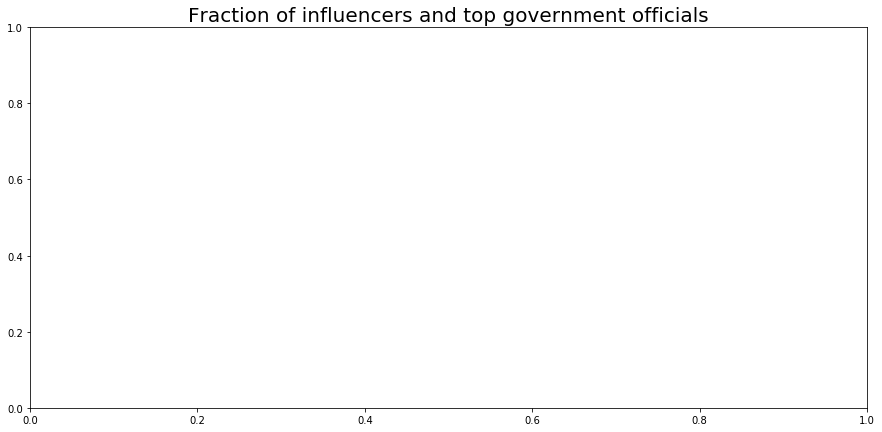

In [34]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Fraction of influencers and top government officials', fontsize=20)
df.groupby(df.index.map(lambda x:x.date())).source.count().plot.bar(rot=45)
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number of Tweets', fontsize=20)